In [60]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/employee_attrition_classification.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              244 non-null    object 
 1   work_accident           248 non-null    object 
 2   emp_id                  241 non-null    object 
 3   left_company            239 non-null    float64
 4   salary_k                242 non-null    float64
 5   education_level         236 non-null    object 
 6   promotion_last_5years   241 non-null    object 
 7   years_at_company        236 non-null    float64
 8   salary_k_dup            242 non-null    float64
 9   last_performance_score  240 non-null    float64
dtypes: float64(5), object(5)
memory usage: 20.6+ KB


In [61]:
df.head()

,department,work_accident,emp_id,left_company,salary_k,education_level,promotion_last_5years,years_at_company,salary_k_dup,last_performance_score
0,Finance,No,E60000,0.0,53.06,BACHELORS,No,14.0,53.06,1.0
1,Support,o,E60001,1.0,82.23,PhD,NaN,16.0,82.23,3.0
2,NaN,N,E60002,0.0,165.15,MASTERS,o,14.0,165.15,4.0
3,Sales,NO,NaN,0.0,51.28,NaN,NaN,9.0,51.28,NaN
4,Sales,NO,E60004,1.0,39.74,Bachelors,o,27.0,39.74,4.0


In [62]:
df.columns

Index(['department', 'work_accident', 'emp_id', 'left_company', 'salary_k',
       'education_level', 'promotion_last_5years', 'years_at_company',
       'salary_k_dup', 'last_performance_score'],
      dtype='object')

In [63]:
df0 = df.iloc[0:20, :]
df0

,department,work_accident,emp_id,left_company,salary_k,education_level,promotion_last_5years,years_at_company,salary_k_dup,last_performance_score
0,Finance,No,E60000,0.0,53.06,BACHELORS,No,14.0,53.06,1.0
1,Support,o,E60001,1.0,82.23,PhD,NaN,16.0,82.23,3.0
2,NaN,N,E60002,0.0,165.15,MASTERS,o,14.0,165.15,4.0
3,Sales,NO,NaN,0.0,51.28,NaN,NaN,9.0,51.28,NaN
4,Sales,NO,E60004,1.0,39.74,Bachelors,o,27.0,39.74,4.0
5,HR,No,NaN,0.0,112.87,HIGH SCHOOL,No,3.0,112.87,5.0
6,FINANCE,No,NaN,0.0,120.57,Masters,No,21.0,120.57,5.0
7,HR,No,E60007,0.0,36.24,Masters,es,16.0,36.24,4.0
8,Engineering,NO,E60008,0.0,71.21,Masters,NO,3.0,71.21,1.0
9,Engineering,No,E60009,0.0,67.30,Ph,No,21.0,67.30,NaN


In [69]:
df0.drop(columns=['salary_k_dup', 'last_performance_score'], inplace=True, errors='ignore')
df0.head()

/tmp/ipython-input-4159957858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0.drop(columns=['salary_k_dup', 'last_performance_score'], inplace=True, errors='ignore')


,department,work_accident,emp_id,left_company,salary_k,education_level,promotion_last_5years,years_at_company
0,Finance,No,E60000,0.0,53.06,BACHELORS,No,14.0
1,Support,o,E60001,1.0,82.23,PhD,NaN,16.0
2,NaN,N,E60002,0.0,165.15,MASTERS,o,14.0
3,Sales,NO,NaN,0.0,51.28,NaN,NaN,9.0
4,Sales,NO,E60004,1.0,39.74,Bachelors,o,27.0


In [70]:
df0.isnull().sum()

,0
department,1
work_accident,0
emp_id,3
left_company,1
salary_k,3
education_level,3
promotion_last_5years,2
years_at_company,0


In [71]:
for col in ['department', 'work_accident', 'emp_id', 'education_level', 'promotion_last_5years']:
    mode_value = df0[col].mode()[0]
    df0[col].fillna(mode_value, inplace=True)

for col in ['left_company', 'salary_k', 'years_at_company']:
    median_value = df0[col].median()
    df0[col].fillna(median_value, inplace=True)

df0.isnull().sum()


/tmp/ipython-input-1719661937.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df0[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-1719661937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-1719661937.py:7: FutureWarning: A value is trying to be set on a copy of a Dat

,0
department,0
work_accident,0
emp_id,0
left_company,0
salary_k,0
education_level,0
promotion_last_5years,0
years_at_company,0


In [73]:
df0

,department,work_accident,emp_id,left_company,salary_k,education_level,promotion_last_5years,years_at_company
0,Finance,No,E60000,0.0,53.06,BACHELORS,No,14.0
1,Support,o,E60001,1.0,82.23,PhD,NO,16.0
2,Sales,N,E60002,0.0,165.15,MASTERS,o,14.0
3,Sales,NO,E60000,0.0,51.28,Masters,NO,9.0
4,Sales,NO,E60004,1.0,39.74,Bachelors,o,27.0
5,HR,No,E60000,0.0,112.87,HIGH SCHOOL,No,3.0
6,FINANCE,No,E60000,0.0,120.57,Masters,No,21.0
7,HR,No,E60007,0.0,36.24,Masters,es,16.0
8,Engineering,NO,E60008,0.0,71.21,Masters,NO,3.0
9,Engineering,No,E60009,0.0,67.30,Ph,No,21.0


In [84]:
df0 = df0.copy()

df0['promotion_last_5years'] = (
    df0['promotion_last_5years']
    .astype(str)
    .str.strip()
    .str.lower()
)

df0['promotion_last_5years'] = df0['promotion_last_5years'].replace({
    'no': 0,
    'n': 0,
    'o': 1,
    'es': 1
})

df0['promotion_last_5years'] = pd.to_numeric(df0['promotion_last_5years'], errors='coerce').fillna(0).astype(int)

print(df0['promotion_last_5years'].unique())
df0.info()


[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   department             20 non-null     object 
 1   work_accident          20 non-null     object 
 2   emp_id                 20 non-null     object 
 3   left_company           20 non-null     float64
 4   salary_k               20 non-null     float64
 5   education_level        20 non-null     object 
 6   promotion_last_5years  20 non-null     int64  
 7   years_at_company       20 non-null     float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ KB


In [86]:
df['work_accident'] = (
    df['work_accident']
    .astype(str)
    .str.strip()
    .str.lower()
)

df['work_accident'] = df['work_accident'].replace({
    'no': 0,
    'n': 0,
    'o': 1,
    'yes': 1,
    'es': 1
})

df['work_accident'] = pd.to_numeric(df['work_accident'], errors='coerce').fillna(0).astype(int)

print(df['work_accident'].unique())

[0 1]


In [87]:
df.head()

,department,work_accident,emp_id,left_company,salary_k,education_level,promotion_last_5years,years_at_company
0,Finance,0,E60000,0.0,53.06,BACHELORS,0,14.0
1,Support,1,E60001,1.0,82.23,PhD,0,16.0
2,Finance,0,E60002,0.0,165.15,MASTERS,1,14.0
3,Sales,0,E60001,0.0,51.28,Masters,0,9.0
4,Sales,0,E60004,1.0,39.74,Bachelors,1,27.0


In [112]:
df.to_csv("cleaned_employee_data.csv", index=False)


In [89]:
numerical_cols = df.select_dtypes(include=np.number)
categorical_cols = df.select_dtypes(include='object')

print(numerical_cols.head())

print(categorical_cols.head())

   work_accident  left_company  salary_k  years_at_company
0              0           0.0     53.06              14.0
1              1           1.0     82.23              16.0
2              0           0.0    165.15              14.0
3              0           0.0     51.28               9.0
4              0           1.0     39.74              27.0
  department  emp_id education_level promotion_last_5years
0    Finance  E60000       BACHELORS                     0
1    Support  E60001             PhD                     0
2    Finance  E60002         MASTERS                     1
3      Sales  E60001         Masters                     0
4      Sales  E60004       Bachelors                     1


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-2476619680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='salary_k', data=df, palette='coolwarm', edgecolor='black')


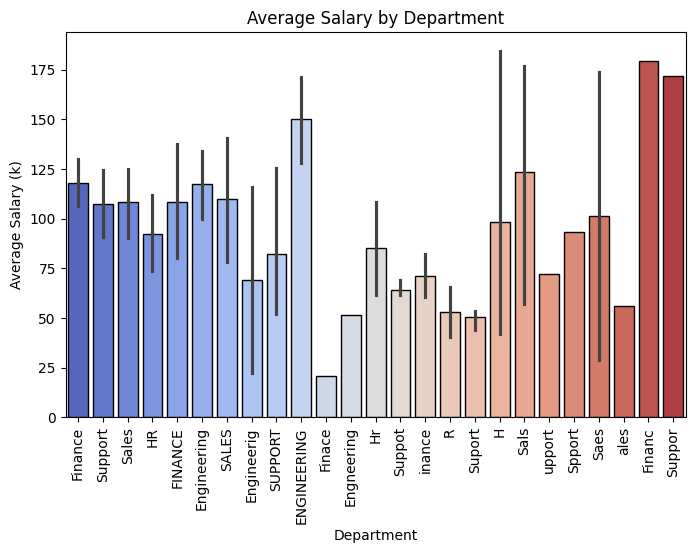

In [97]:
plt.figure(figsize=(8,5))
sns.barplot(x='department', y='salary_k', data=df, palette='coolwarm', edgecolor='black')

plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary (k)')
plt.xticks(rotation=90)
plt.show()

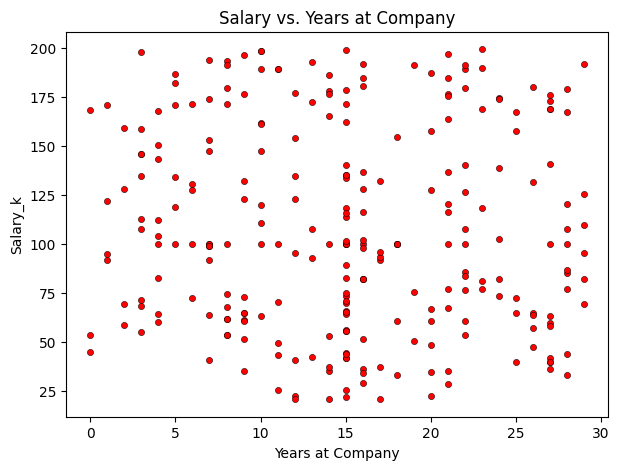

In [105]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='years_at_company', y='salary_k', data=df, color='red', s=20, edgecolor='black')

plt.title('Salary vs. Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Salary_k')
plt.show()

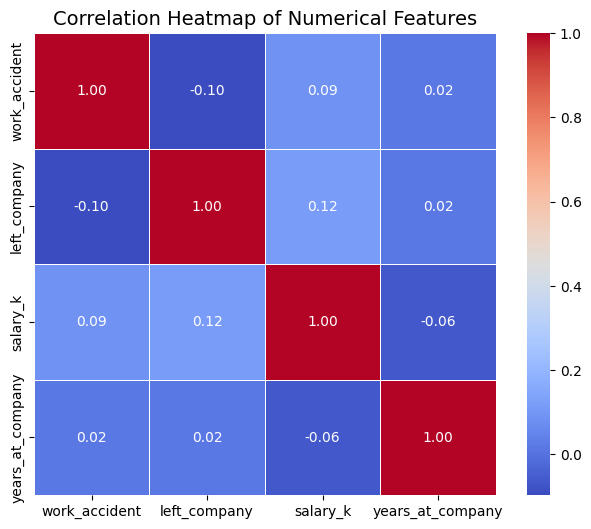

In [109]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar=True,
    square=True
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

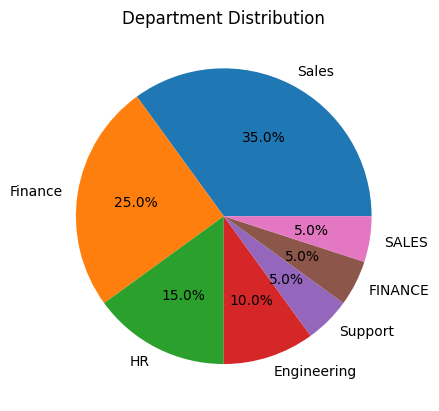

In [111]:
dept_counts = df0['department'].value_counts()

plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%')
plt.title('Department Distribution')
plt.show()

**Data Cleaning Steps**

Handled missing values using median for numerical and mode for categorical columns.

Standardized categorical values (e.g., “No”, “N”, “o” → 0 and 1).

Removed unnecessary dummy columns and ensured correct data types.

Converted categorical indicators (like promotion_last_5years, work_accident) into numeric form for analysis.

***Data Overview***

Total records: 20 employees

Columns analyzed:

Categorical: department, work_accident, emp_id, education_level

Numerical: salary_k, years_at_company, left_company, promotion_last_5years

**Visualizations **

Bar Charts → Showed average salary across departments.

***Scatter Plot*** → Displayed relationship between salary_k and years_at_company.

**Heatmap** → Highlighted correlations among numerical variables.

Pie Chart → Showed department-wise and promotion status distribution.

**Key Insights**

Departments like Sales and Finance have more employees.

Employees with more years at the company generally have higher salaries.

The promotion rate is relatively low compared to total employees.

Education level shows some variation across departments but no strong salary link observed.